In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
# Load data


In [6]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#check for nullvalues
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
for i in df.columns:
    print(df[i].value_counts())

200    1
63     1
73     1
72     1
71     1
70     1
69     1
68     1
67     1
66     1
65     1
64     1
62     1
199    1
61     1
60     1
59     1
58     1
57     1
56     1
55     1
54     1
53     1
52     1
74     1
75     1
76     1
77     1
98     1
97     1
      ..
106    1
105    1
104    1
103    1
124    1
126    1
149    1
127    1
148    1
147    1
146    1
145    1
144    1
143    1
142    1
141    1
140    1
139    1
138    1
137    1
136    1
135    1
134    1
133    1
132    1
131    1
130    1
129    1
128    1
1      1
Name: CustomerID, Length: 200, dtype: int64
Female    112
Male       88
Name: Gender, dtype: int64
32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
5

In [18]:
df.shape

(200, 5)

In [16]:
df['CustomerID'].nunique()    #that is there is no duplicate customerId 

200

In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#the average age of the customers is 38 and almost 75% customers are below the age of 49...We can use this data to make offers 
the anual income in dollars happens to be around 61$ on an average ...This data will be useful to know the brand of items they can afford and will buy 


In [22]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

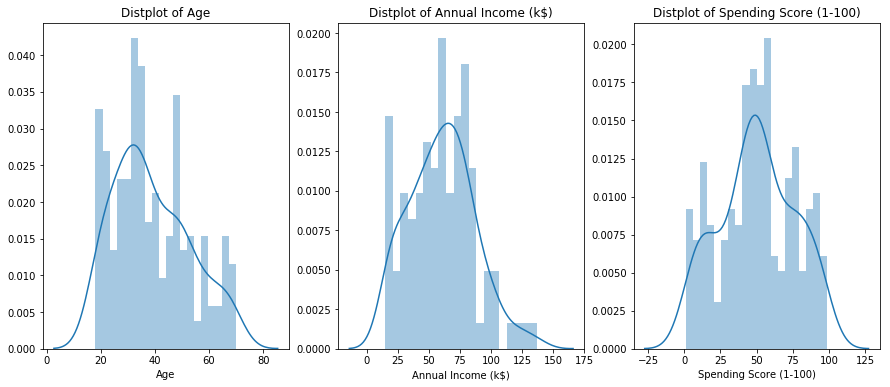

In [23]:
#visualization
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

age is positive skewed 
 spending score looks  normally distributed 


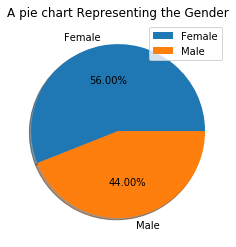

In [27]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()

plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender')
plt.axis('off')
plt.legend()
plt.show()

#it is clear that women customers are more than male customers by 12% ,And more schemes or offers should be introduced to retain them and also work on getting offer for men 

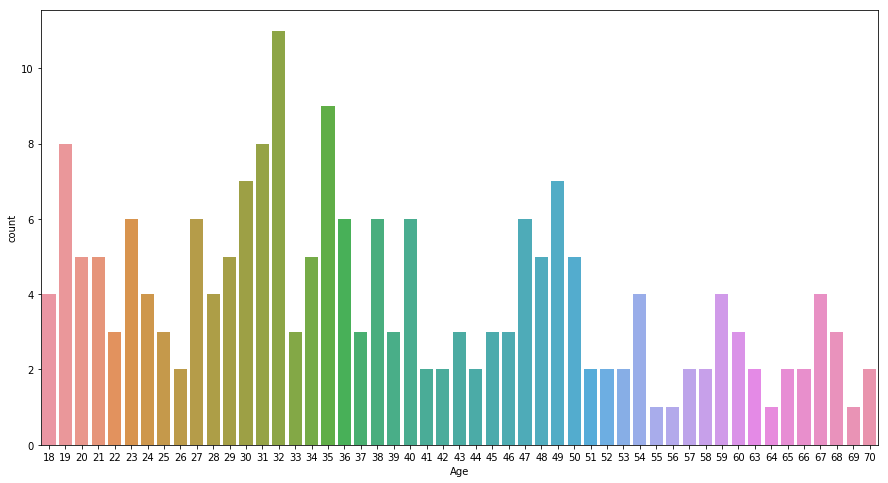

In [30]:
plt.rcParams['figure.figsize'] = (15, 8)        #use this default to see labels 
sns.countplot(df['Age'])

Text(0.5, 1.0, 'Salary')

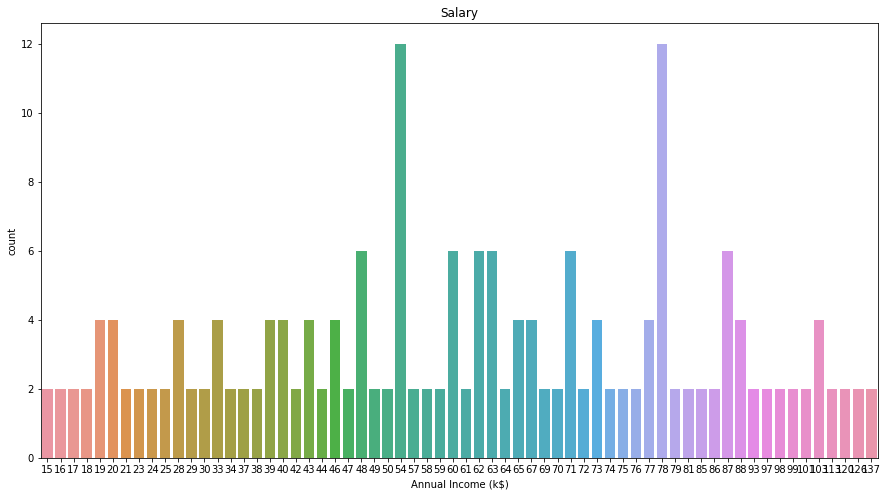

In [33]:
plt.rcParams['figure.figsize'] = (15, 8)        #use this default to see labels 
sns.countplot(df['Annual Income (k$)'])
plt.title('Salary')

ppl earning $54 and $78 is the max 
income looks to be negative skewed 


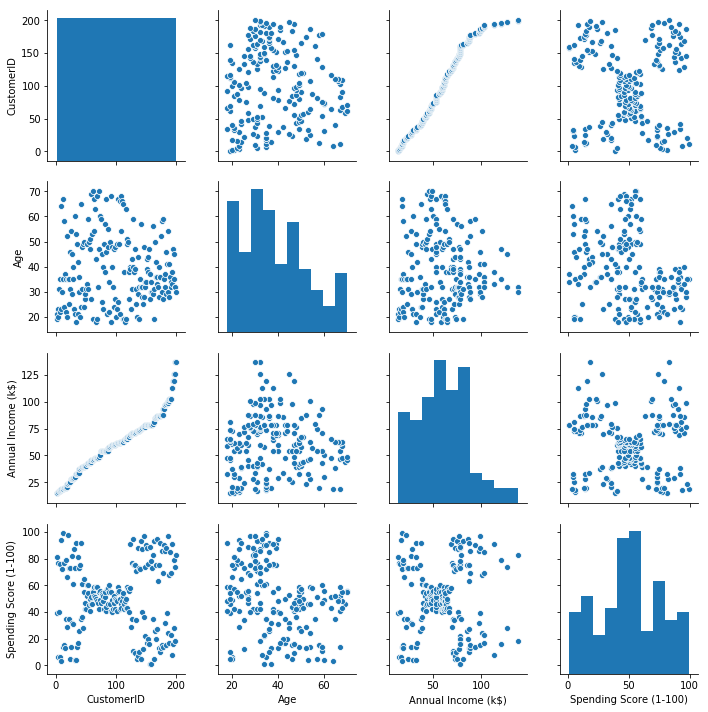

In [34]:
#finding the distribution between all the variables
sns.pairplot(df)

there is a clustering possible seeing the distribution especially when it s clearly seen between customerID abd Spendin_Score 

In [35]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [38]:
df=df.drop(columns='CustomerID')
#customerId is nominal data and usually nominal data doesnt add to insight 

In [42]:
X=df.iloc[:, [2,3]].values          #we cnsider the AnnualIncome and Spending score to make cluster 
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [53]:

#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10 . but I have used 14
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,14):                 #we can manually see that the visualization should there can be 5 clusters we are still to affirm so take a larger range 
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)  
    print(kmeans.inertia_)   #the fall from 5 is max and then it gradually steeps down  
    wcss.append(kmeans.inertia_)



269981.28
181363.59595959596
106348.37306211118
73679.78903948834
44448.45544793371
37265.86520484347
30259.65720728547
25095.703209997548
21830.041978049434
20736.679938924124
17702.595932296277
15810.838613705502
14763.330402558204


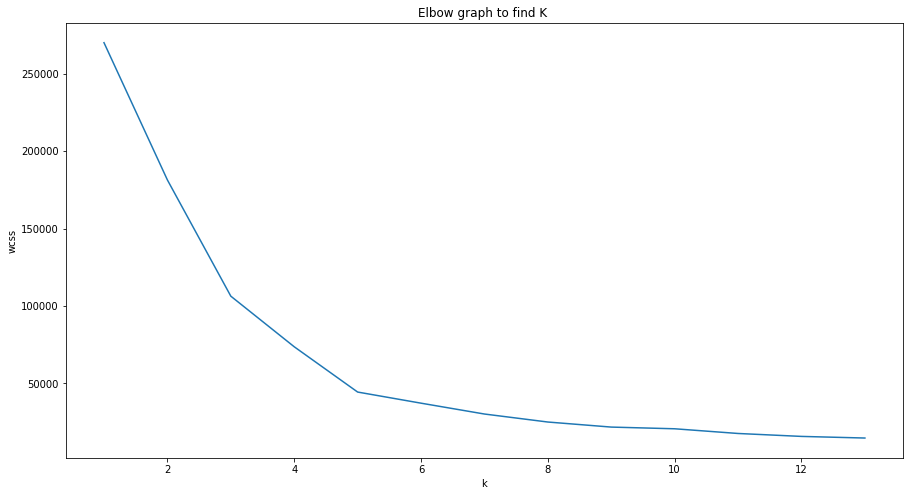

In [57]:
plt.plot(range(1,14), wcss)
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Elbow graph to find K ')
plt.show()


In [61]:
#Model Build
kmeansmodel=KMeans(n_clusters= 5, init='k-means++', random_state=0)    #here we build the model now using the n_cluster=5
y_kmeans= kmeansmodel.fit_predict(X)

In [60]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [66]:
labels2=kmeansmodel.labels_
centroids2=kmeansmodel.cluster_centers_
print(labels2)
print(centroids2)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


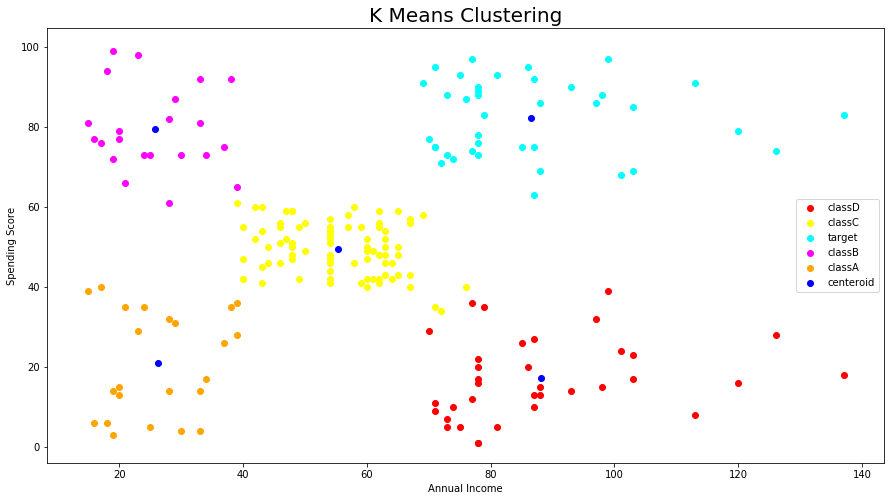

In [124]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)
import seaborn as sns

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1],c = 'red', label = 'classD')#have a capacity but wnt pay 
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], c = 'yellow', label = 'classC') #this can be considered as a target cos they spend expanding their capacity 
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], c = 'cyan', label = 'target') #they have high income and they spend well
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1],  c = 'magenta', label = 'classB') #they do spend well but they may be the occassional ones who spend max 
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], c = 'orange', label = 'classA') #these are the ones who are low spenders 
#sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data = X,hue='labels',palette="Set1",legend="full")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [120]:
X[y_means == 0, 1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

In [98]:
print(X[y_means == 0, 0], X[y_means == 0, 1])
print(X[y_means == 1, 0], X[y_means == 1, 1])

[ 70  71  71  73  73  74  75  77  77  78  78  78  78  78  78  79  81  85
  86  87  87  87  88  88  93  97  98  99 101 103 103 113 120 126 137] [29 11  9  5  7 10  5 12 36 22 17 20 16  1  1 35  5 26 20 27 13 10 13 15
 14 32 15 39 24 17 23  8 16 28 18]
[39 40 40 40 40 42 42 43 43 43 43 44 44 46 46 46 46 47 47 48 48 48 48 48
 48 49 49 50 50 54 54 54 54 54 54 54 54 54 54 54 54 57 57 58 58 59 59 60
 60 60 60 60 60 61 61 62 62 62 62 62 62 63 63 63 63 63 63 64 64 65 65 65
 65 67 67 67 67 69 71 72 76] [61 55 47 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59
 47 55 42 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49
 40 42 52 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43
 59 43 57 56 40 58 35 34 40]


In [84]:
X.shape
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [104]:
print(y_means.shape)
print(y_means)

(200,)
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [109]:
k=y_means[y_means==0]
print("means=0",k.shape)
l=y_means[y_means==1]
print("meams=1",l.shape)
l=y_means[y_means==2]
print("meams=2",l.shape)
l=y_means[y_means==3]
print("meams=3",l.shape)
l=y_means[y_means==4]
print("meams=4",l.shape)


means=0 (35,)
meams=1 (81,)
meams=2 (39,)
meams=3 (22,)
meams=4 (23,)


In [74]:
km.cluster_centers_[:, 0]  #x cordinate of centroid
km.cluster_centers_[:, 1]  #y cordinate of centroid

array([17.11428571, 49.51851852, 82.12820513, 79.36363636, 20.91304348])

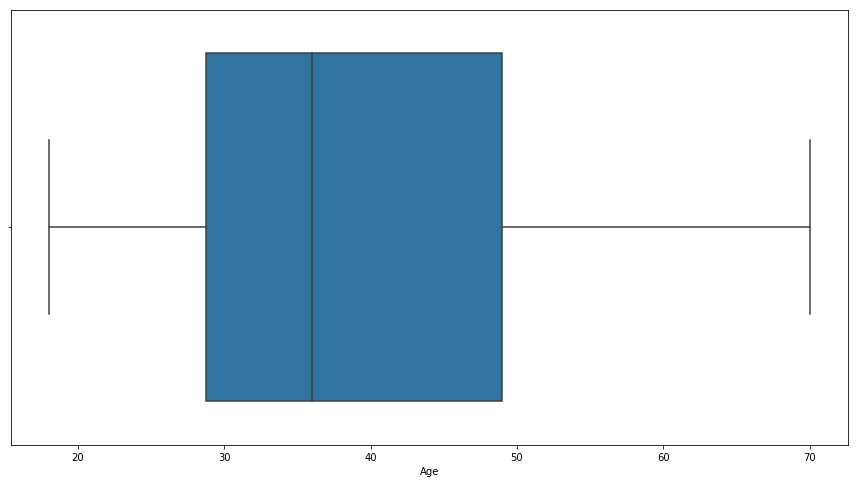

In [133]:
import seaborn as sns
#for i  in [,,]:
sns.boxplot(x=df['Age'])


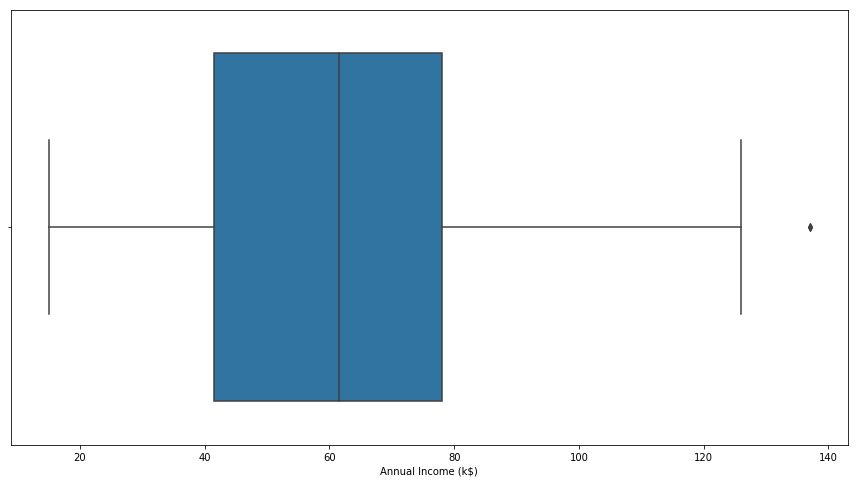

In [134]:
sns.boxplot(x=df['Annual Income (k$)'])


In [136]:
#as we see in the above there are outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR.keys())
IQR.values

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


array([20.25, 36.5 , 38.25])

In [139]:
df_outlier_pct = pd.DataFrame(columns=['Colname','Outlier_Count','Pct'],data=None)

In [140]:
loc = 0
for col in IQR.keys():
    if df['Annual Income (k$)'].dtype == 'int64':
        outlier_cnt = ((df['Annual Income (k$)'] < (Q1['Annual Income (k$)'] - 1.5 * IQR['Annual Income (k$)'])) | (df['Annual Income (k$)'] > (Q3[col] + 1.5 * IQR[col]))).sum()
        df_outlier_pct.loc[loc,'Colname'] = col
        df_outlier_pct.loc[loc,'Outlier_Count'] = outlier_cnt
        df_outlier_pct.loc[loc,'Pct'] = outlier_cnt/len(df['Annual Income (k$)'])
        loc+=1

In [141]:
df_outlier_pct 

,Colname,Outlier_Count,Pct
0,Age,38,0.19
1,Annual Income (k$),2,0.01
2,Spending Score (1-100),2,0.01


In [ ]:
#Age outlier is needed and so is of the other values so we shld try using kmedian instead of kmean

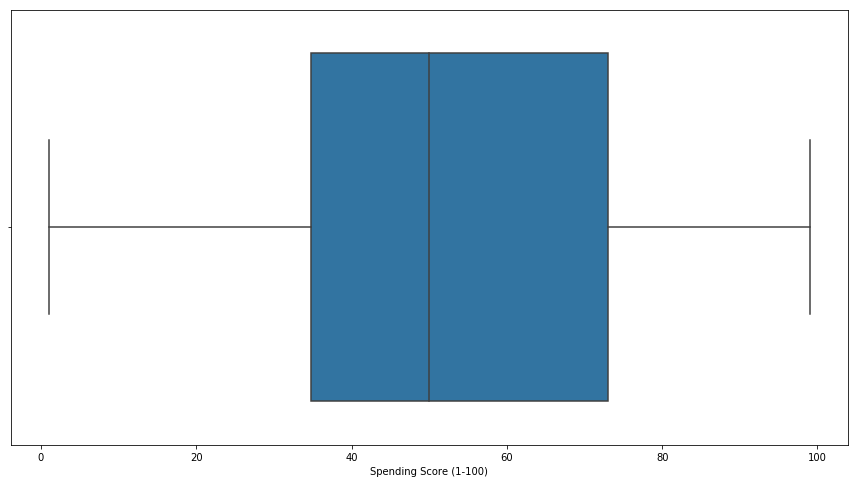

In [135]:
sns.boxplot(x=df['Spending Score (1-100)'])

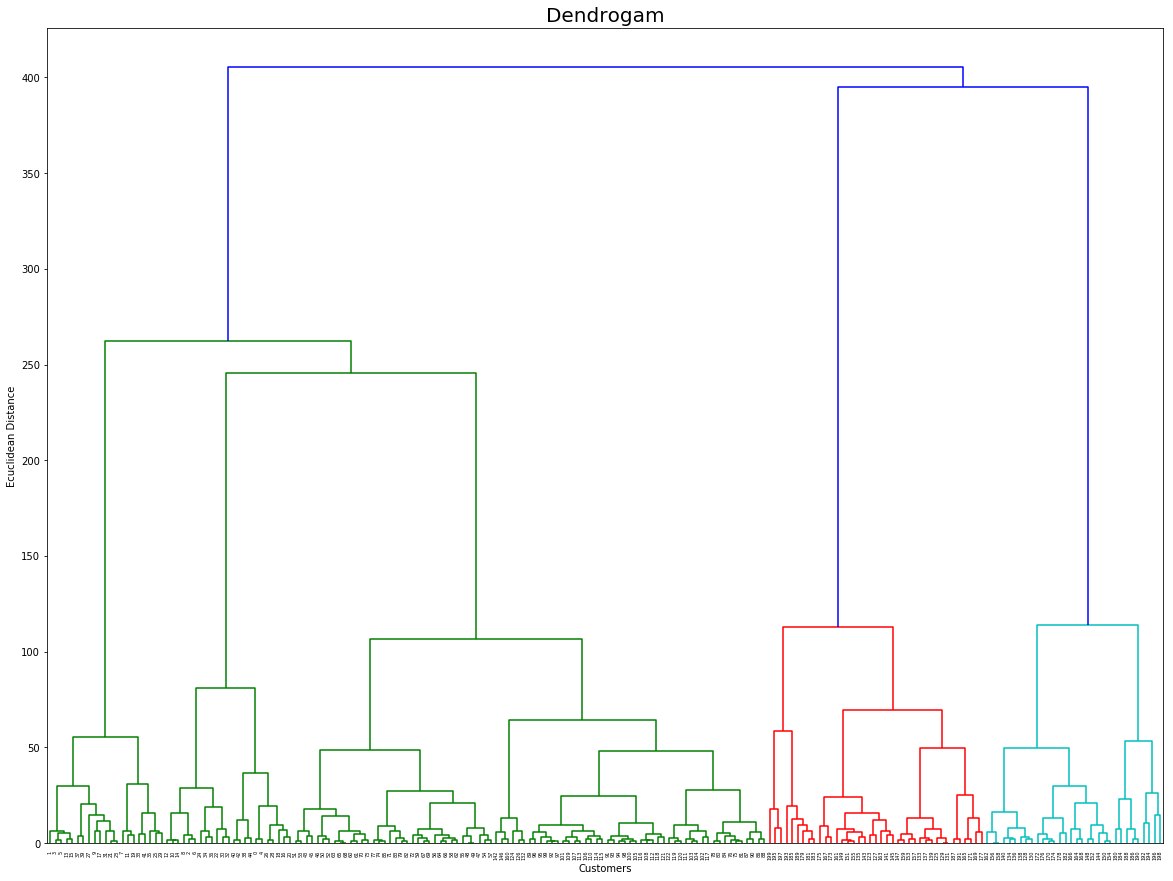

In [155]:
#heirarchial clustering 
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20,15) 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

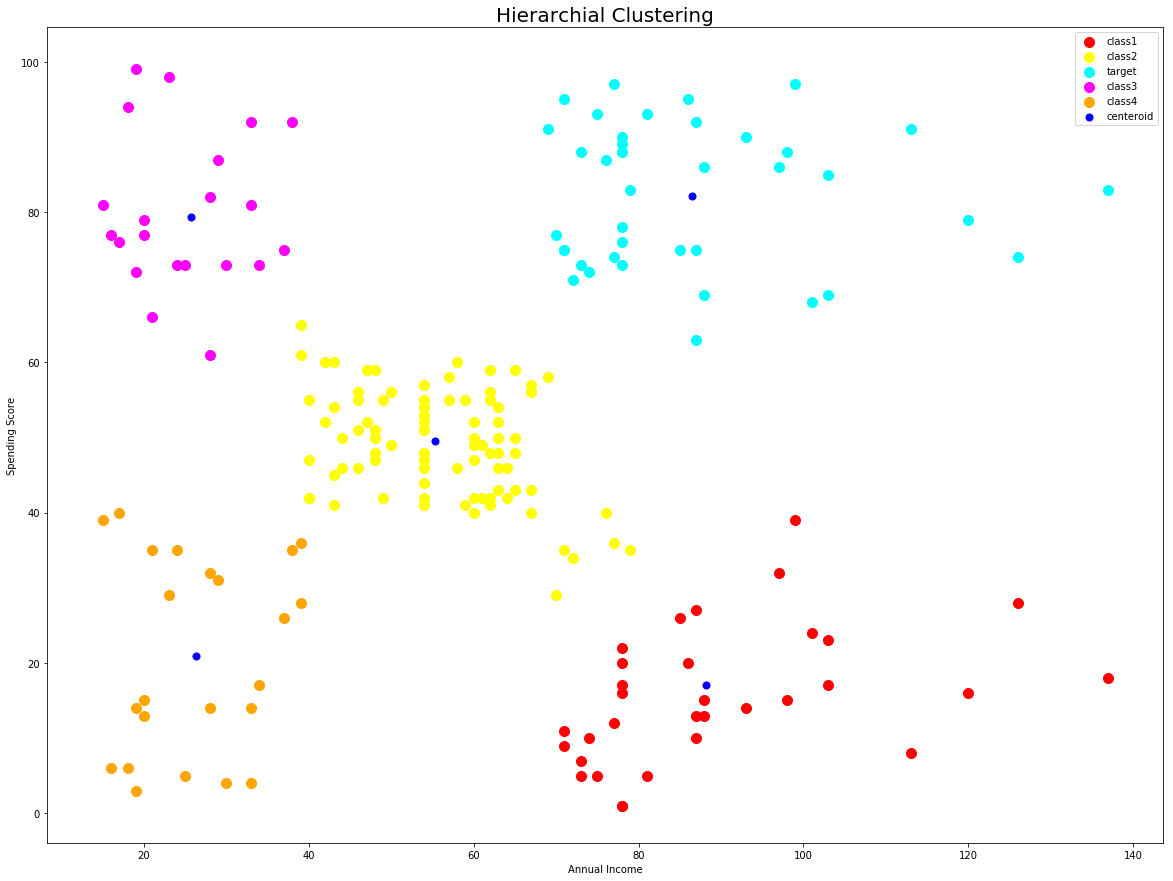

In [158]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'class1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'class2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta', label = 'class3')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orange', label = 'class4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

#as we did above one for spending score and income 
#we will do the below one for age and speding scrore ...this will help us to know the age group we have to target 

In [159]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [160]:
X=df.iloc[:, [1,3]].values          #we cnsider the AnnualIncome and Spending score to make cluster 
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [161]:
wcss=[]

#we always assume the max number of cluster would be 10 . but I have used 14
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,14):                 #we can manually see that the visualization should there can be 5 clusters we are still to affirm so take a larger range 
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)  
    print(kmeans.inertia_)   #the fall from 5 is max and then it gradually steeps down  
    wcss.append(kmeans.inertia_)



171535.5
75949.15601023017
45840.67661610867
28165.58356662934
23811.52352472089
19502.407839362204
15598.876804915515
13082.95148962149
11584.675652356902
10282.713123669808
9613.709528597763
8758.684537500572
7976.755188215637


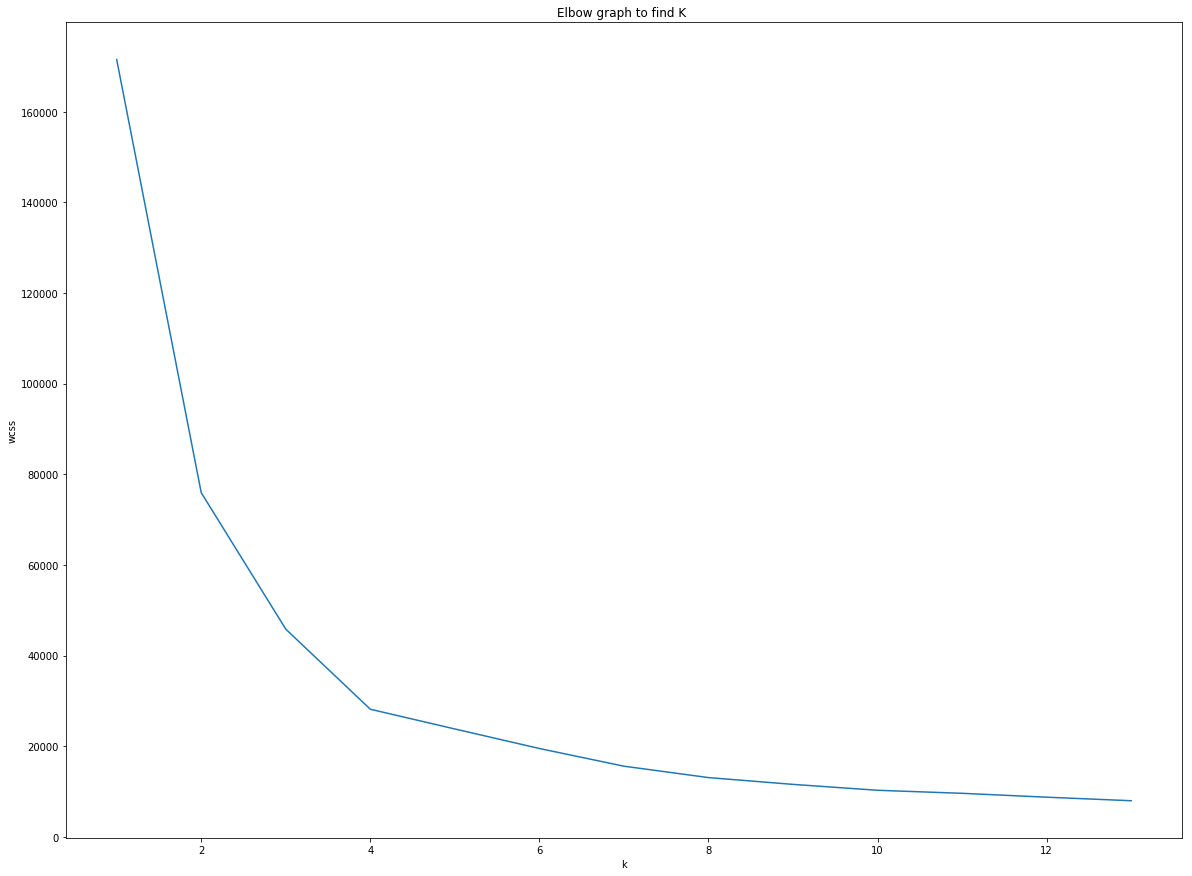

In [162]:
plt.plot(range(1,14), wcss)
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Elbow graph to find K ')
plt.show()


the steep fall is at 4

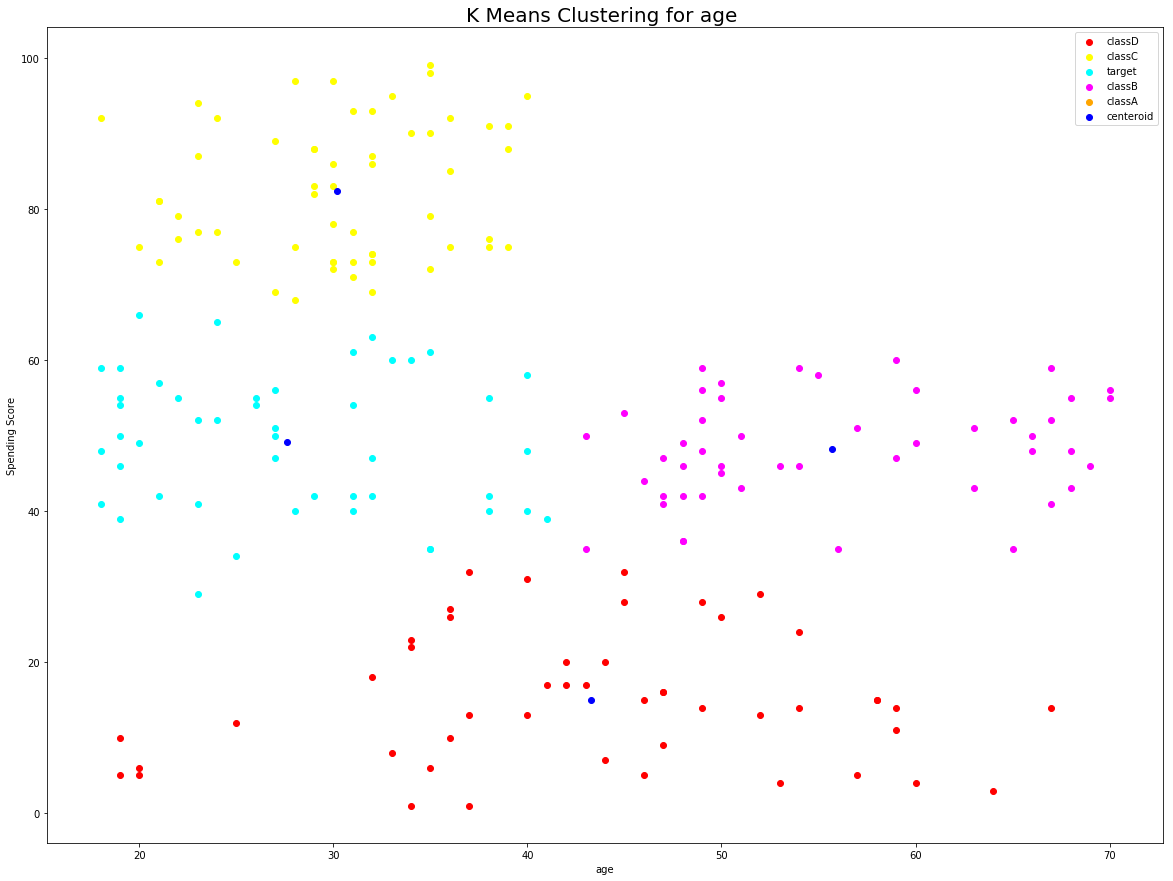

In [164]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)
import seaborn as sns

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1],c = 'red', label = 'classD')#have a capacity but wnt pay 
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], c = 'yellow', label = 'classC') #this can be considered as a target cos they spend expanding their capacity 
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], c = 'cyan', label = 'target') #they have high income and they spend well
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1],  c = 'magenta', label = 'classB') #they do spend well but they may be the occassional ones who spend max 
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], c = 'orange', label = 'classA') #these are the ones who are low spenders 
#sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data = X,hue='labels',palette="Set1",legend="full")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering for age ', fontsize = 20)
plt.xlabel('age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

The distance between the points in this cluster is high...clustering with income is better if compared with age

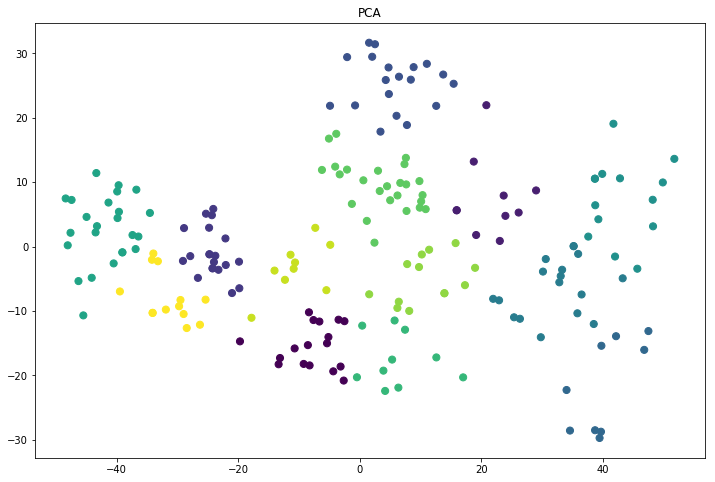

In [168]:

from sklearn.decomposition import PCA


# Visualizing using PCA
pca = PCA(n_components=2)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA');

PCA seems to have failed terebbley that may be bcos pca works well with high variance data and here we didnt have high variance and much dimensions too 
so here we stick with kmeans giving us the best results 
But note that kmeans doesnt work well if u data has outliers ..
Use kmedian instead